In [387]:
from statistics import correlation
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import math
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [388]:
file_path = '.\diabetes_binary_classification_data.csv'
data = pd.read_csv(file_path)

## Exploring data

In [389]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [391]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


array([[<Axes: title={'center': 'Diabetes_binary'}>,
        <Axes: title={'center': 'HighBP'}>,
        <Axes: title={'center': 'HighChol'}>,
        <Axes: title={'center': 'CholCheck'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoker'}>,
        <Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'HeartDiseaseorAttack'}>,
        <Axes: title={'center': 'PhysActivity'}>,
        <Axes: title={'center': 'Fruits'}>],
       [<Axes: title={'center': 'Veggies'}>,
        <Axes: title={'center': 'HvyAlcoholConsump'}>,
        <Axes: title={'center': 'AnyHealthcare'}>,
        <Axes: title={'center': 'NoDocbcCost'}>,
        <Axes: title={'center': 'GenHlth'}>],
       [<Axes: title={'center': 'MentHlth'}>,
        <Axes: title={'center': 'PhysHlth'}>,
        <Axes: title={'center': 'DiffWalk'}>,
        <Axes: title={'center': 'Sex'}>, <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Education'}>,
        <Axes: title=

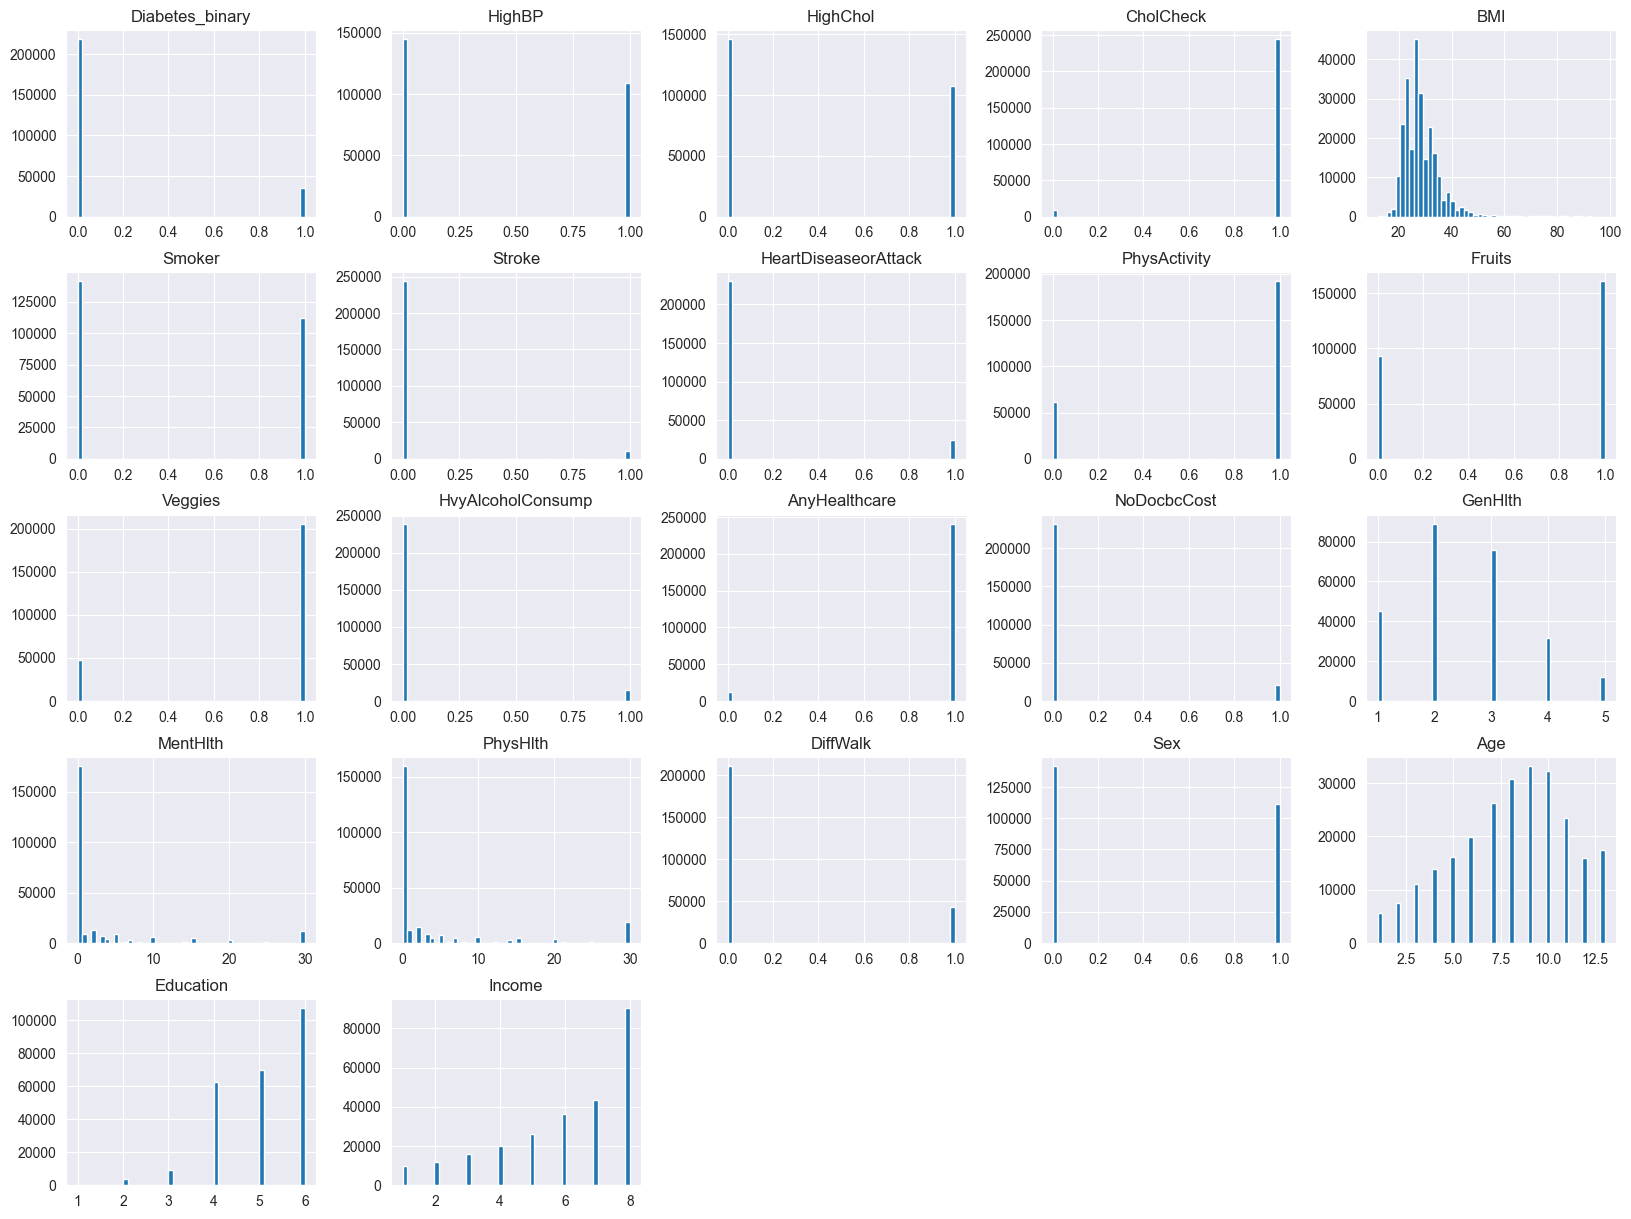

In [392]:
data.hist(bins = 50, figsize = (20,15))

In [393]:
correlations = data.corr()
correlations["Diabetes_binary"].sort_values(ascending = False)

Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64

No features have a high correlation with our target feature *Diabetes_binary*. Let us however look at the feature with the highest correlation, *GenHlth*.

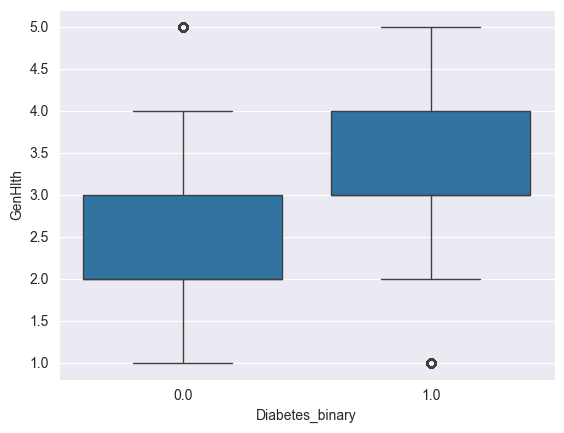

In [394]:
sns.boxplot(x = "Diabetes_binary", y = "GenHlth", data = data)
plt.show()

Here, we see that the majority of people **without** diabetes would say their general health is between very good and good, while the majority
of people **with** diabetes would say their general health is between good and fair.

In [395]:
# Additional features
data_add = data.copy()

# Cardiovascular risk
data_add['CardioRisk'] = ((data_add['HighBP'] == 1) | (data_add['HighChol'] == 1))

# Severe Cardiovascular condition
data_add['SevereCardioCondition'] = ((data_add['Stroke'] == 1) | (data_add['HeartDiseaseorAttack'] == 1))

data_add.drop(columns = ['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack'], inplace = True)

data_add.columns

Index(['Diabetes_binary', 'CholCheck', 'BMI', 'Smoker', 'PhysActivity',
       'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex',
       'Age', 'Education', 'Income', 'CardioRisk', 'SevereCardioCondition'],
      dtype='object')

In [396]:
correlations = data_add.corr()
correlations["Diabetes_binary"].sort_values(ascending = False)

Diabetes_binary          1.000000
GenHlth                  0.293569
CardioRisk               0.230609
DiffWalk                 0.218344
BMI                      0.216843
SevereCardioCondition    0.186011
Age                      0.177442
PhysHlth                 0.171337
MentHlth                 0.069315
CholCheck                0.064761
Smoker                   0.060789
NoDocbcCost              0.031433
Sex                      0.031430
AnyHealthcare            0.016255
Fruits                  -0.040779
Veggies                 -0.056584
HvyAlcoholConsump       -0.057056
PhysActivity            -0.118133
Education               -0.124456
Income                  -0.163919
Name: Diabetes_binary, dtype: float64

### Data Preproccesing

<Axes: >

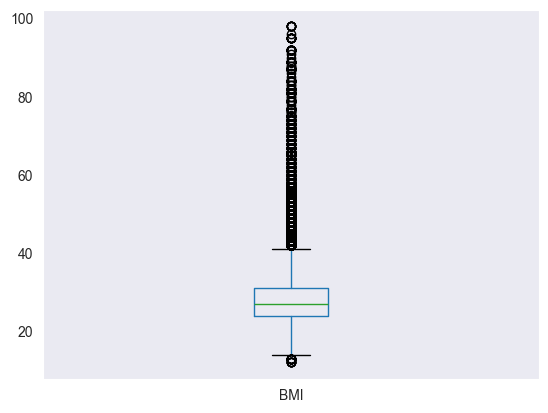

In [397]:
data.boxplot(column = ["BMI"], grid = False)

In [398]:
# Scale the dataset with new features
df = data.copy()

columns_to_scale = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,0.6,0.285714
1,0.0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,1.0,0.000000
2,0.0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.6,1.000000
3,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,0.4,0.714286
4,0.0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8,0.428571


In [399]:
# Scale the dataset
df = data_add.copy()

columns_to_scale = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth', 'Education', 'Income']

scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Diabetes_binary,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,CardioRisk,SevereCardioCondition
0,0.0,1.0,0.325581,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,0.6,0.285714,True,False
1,0.0,0.0,0.151163,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,1.0,0.000000,False,False
2,0.0,1.0,0.186047,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.6,1.000000,True,False
3,0.0,1.0,0.174419,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,0.4,0.714286,True,False
4,0.0,1.0,0.139535,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8,0.428571,True,False


### Split the data into test and train set


In [400]:
X = df.drop("Diabetes_binary", axis = 1)
Y = df["Diabetes_binary"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(X_train.shape, "Train instances")
print(X_test.shape, "Test instances")

(202944, 19) Train instances
(50736, 19) Test instances


In [401]:
# Function to plot confusion matrix heatmap for all models
def plot_confusion_matrix(confusion_matrix, title="Confusion Matrix", figsize=(10, 7), cmap='Blues'):
    plt.figure(figsize=figsize)
    plt.title(title)
    sns.heatmap(confusion_matrix, annot=True, cmap=cmap, fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [402]:
# Function to plot roc curve for all models
def compute_roc_auc(model, X_test, Y_test):
    # Predict probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Compute ROC curve and AUC
    falsePositiveRate, truePositiveRate, _ = roc_curve(Y_test, y_pred_prob)
    roc_auc = auc(falsePositiveRate, truePositiveRate)
    return falsePositiveRate, truePositiveRate, roc_auc

# Function to plot roc curve for all models
def plot_roc_curves(models, model_names, X_test, Y_test):
    fig = go.Figure()

    # Iterate over all models
    for model, name in zip(models, model_names):
        fpr, tpr, roc_auc = compute_roc_auc(model, X_test, Y_test)
        fig.add_trace(go.Scatter(
            x=fpr, y=tpr, mode='lines', name=f'{name} (AUC = {roc_auc:.2f})'
        ))

    # Add a random guess line
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Guess', line=dict(dash='dash')))

    # Update layout
    fig.update_layout(
        title="Receiver Operating Characteristic (ROC) Curves for all Models",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        showlegend=True)
    
    fig.show()

In [403]:
# Function to compute sensitivity and specificity
def compute_sensitivity_specificity(confusion_matrix):
    
    sensitivity = confusion_matrix[1][1] / (confusion_matrix[1][0] + confusion_matrix[1][1])
    
    specificity = confusion_matrix[0][0] / (confusion_matrix[0][0] + confusion_matrix[0][1])
    
    print("Sensitivity:", round(sensitivity, 2))
    print("Specificity:", round(specificity, 2))


### Logistic regression

In [404]:
logistic_model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

logistic_model.fit(X_train, Y_train)

y_pred = logistic_model.predict(X_test)

logistic_report = classification_report(Y_test, y_pred)

logistic_confusion_matrix = confusion_matrix(Y_test, y_pred)


print(logistic_confusion_matrix)
print(logistic_report)

[[31237 12502]
 [ 1546  5451]]
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.82     43739
         1.0       0.30      0.78      0.44      6997

    accuracy                           0.72     50736
   macro avg       0.63      0.75      0.63     50736
weighted avg       0.86      0.72      0.76     50736



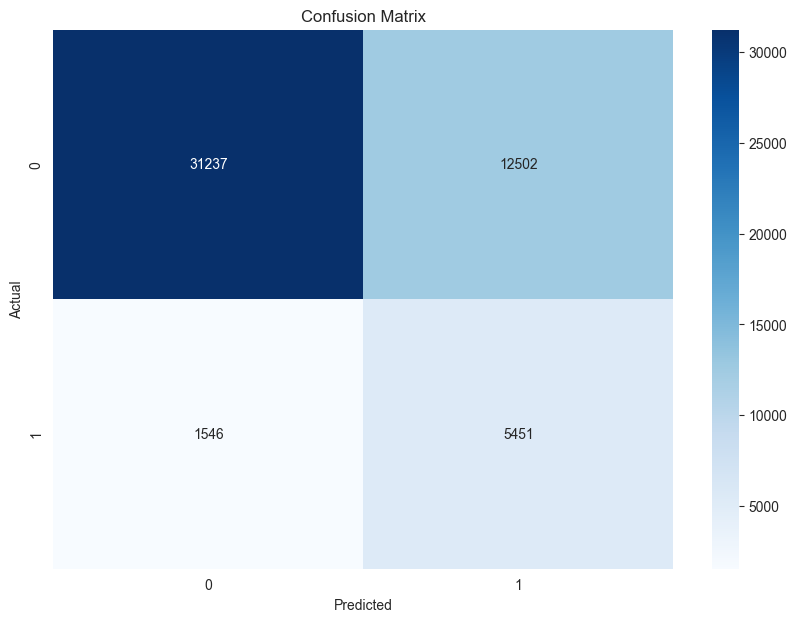

In [405]:
# Plotting the confusion matrix heatmap for logistic regression
plot_confusion_matrix(logistic_confusion_matrix)

In [406]:
# Compute sensitivity and specificity for logistic regression
compute_sensitivity_specificity(logistic_confusion_matrix)

Sensitivity: 0.78
Specificity: 0.71


### Random Forest

In [407]:
random_forest_model = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest_model.fit(X_train, Y_train)

y_pred_rf = random_forest_model.predict(X_test)

rf_report = classification_report(Y_test, y_pred_rf)
rf_confusion_matrix = confusion_matrix(Y_test, y_pred_rf)

print(rf_report)
print(rf_confusion_matrix)

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43739
         1.0       0.40      0.15      0.22      6997

    accuracy                           0.85     50736
   macro avg       0.64      0.56      0.57     50736
weighted avg       0.81      0.85      0.82     50736

[[42173  1566]
 [ 5947  1050]]


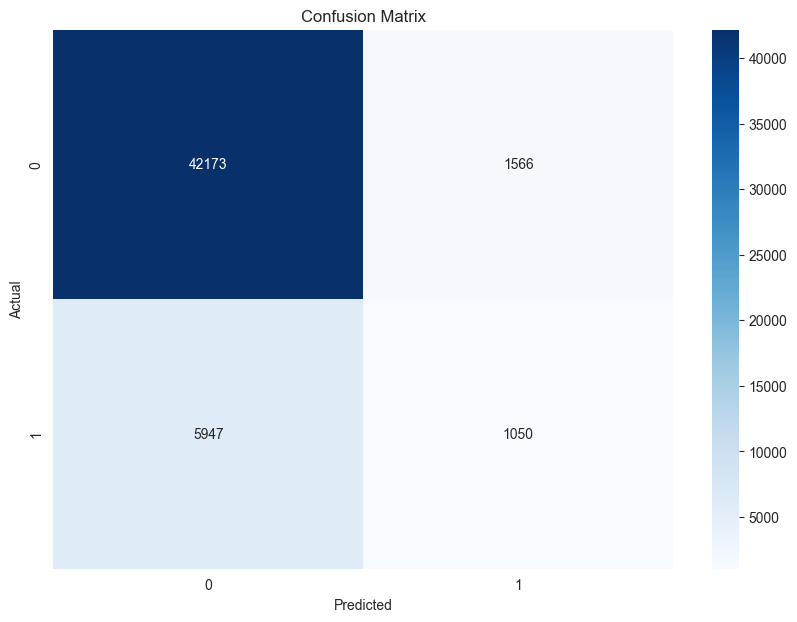

In [408]:
# Plotting the confusion matrix heatmap for Random Forest
plot_confusion_matrix(rf_confusion_matrix)

In [409]:
# Compute sensitivity and specificity for Random Forest
compute_sensitivity_specificity(rf_confusion_matrix)

Sensitivity: 0.15
Specificity: 0.96


## Adaboost classifier

In [410]:
adaboost_model = AdaBoostClassifier(random_state=42)

adaboost_model.fit(X_train, Y_train)

y_pred_ab = adaboost_model.predict(X_test)

ab_report = classification_report(Y_test, y_pred_ab)
ab_confusion_matrix = confusion_matrix(Y_test, y_pred_ab)

print(ab_report)
print(ab_confusion_matrix)

C:\5. Semester\Maskinlæring\Assignment 1\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.54      0.17      0.26      6997

    accuracy                           0.87     50736
   macro avg       0.71      0.57      0.59     50736
weighted avg       0.83      0.87      0.83     50736

[[42735  1004]
 [ 5807  1190]]


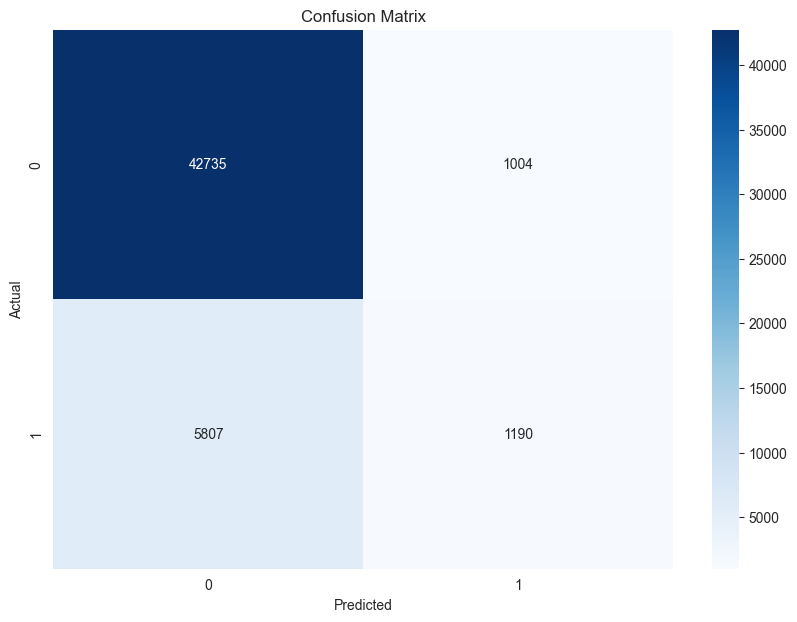

In [411]:
# Plotting the confusion matrix heatmap for Random Forest
plot_confusion_matrix(ab_confusion_matrix)

In [412]:
# Compute sensitivity and specificity for Random Forest
compute_sensitivity_specificity(ab_confusion_matrix)

Sensitivity: 0.17
Specificity: 0.98


In [413]:
# Plot ROC curve for all models
plot_roc_curves([logistic_model, random_forest_model, adaboost_model], ['Logistic Regression', 'Random Forest', 'AdaBoost'] , X_test, Y_test)

## Feature Selection

In [414]:
# Select the top 5 features with the highest correlation
top_5_features = ["GenHlth", "HighBP", "DiffWalk", "BMI", "HighChol"]

# Create a subset of the data with the top 5 features
top_5_subset = data[top_5_features]
top_5_subset.head()

,GenHlth,HighBP,DiffWalk,BMI,HighChol
0,5.0,1.0,1.0,40.0,1.0
1,3.0,0.0,0.0,25.0,0.0
2,5.0,1.0,1.0,28.0,1.0
3,2.0,1.0,0.0,27.0,0.0
4,2.0,1.0,0.0,24.0,1.0


In [415]:
# Scale the new subset
scaler = MinMaxScaler()

top_5_subset = scaler.fit_transform(top_5_subset)

In [416]:
# Split the data into test and train set
X_train_subset, X_test_subset, Y_train_subset, Y_test_subset = train_test_split(
    top_5_subset, Y, test_size = 0.2, random_state = 42)

### Logistic regression with subset of features

In [417]:
# Logistic model with subset of features
logistic_model_subsets = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

logistic_model_subsets.fit(X_train_subset, Y_train_subset)

y_pred_subset = logistic_model_subsets.predict(X_test_subset)

logistic_report_subset= classification_report(Y_test_subset, y_pred_subset)

logistic_confusion_matrix_subset = confusion_matrix(Y_test_subset, y_pred_subset)

print(logistic_confusion_matrix_subset)
print(logistic_report_subset)

[[31400 12339]
 [ 1733  5264]]
              precision    recall  f1-score   support

         0.0       0.95      0.72      0.82     43739
         1.0       0.30      0.75      0.43      6997

    accuracy                           0.72     50736
   macro avg       0.62      0.74      0.62     50736
weighted avg       0.86      0.72      0.76     50736



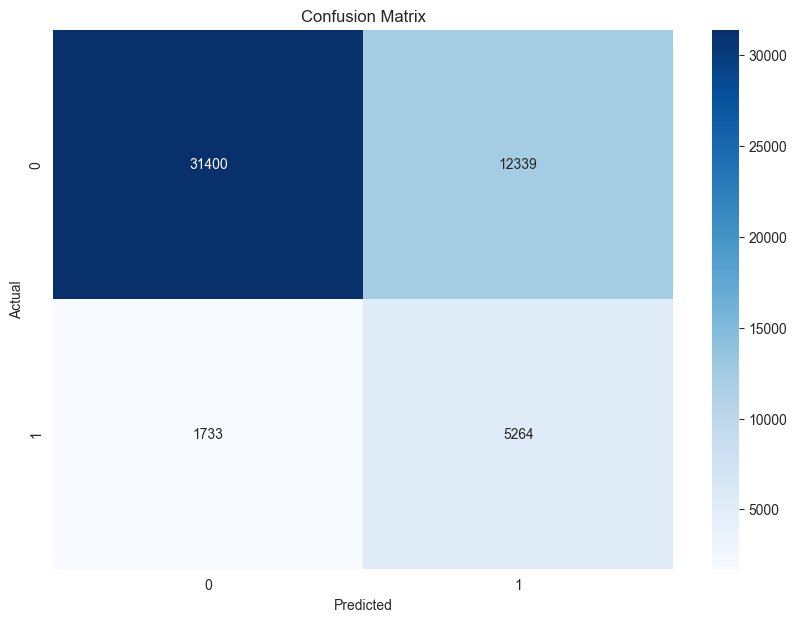

In [418]:
# Plotting the confusion matrix heatmap for logistic regression with subset of features
plot_confusion_matrix(logistic_confusion_matrix_subset)

In [419]:
# Compute sensitivity and specificity for logistic regression with subset of features
compute_sensitivity_specificity(logistic_confusion_matrix_subset)

Sensitivity: 0.75
Specificity: 0.72


### Random Forest with subset of features

In [420]:
# Random forest model with subset of features
random_forest_model_subset = RandomForestClassifier(random_state=42, class_weight='balanced')
random_forest_model_subset.fit(X_train_subset, Y_train_subset)

y_pred_rf_subset = random_forest_model_subset.predict(X_test_subset)

rf_report_subset = classification_report(Y_test_subset, y_pred_rf_subset)
rf_confusion_matrix_subset = confusion_matrix(Y_test_subset, y_pred_rf_subset)

print(rf_report_subset)
print(rf_confusion_matrix_subset)

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.81     43739
         1.0       0.29      0.77      0.42      6997

    accuracy                           0.71     50736
   macro avg       0.62      0.73      0.61     50736
weighted avg       0.86      0.71      0.75     50736

[[30593 13146]
 [ 1640  5357]]


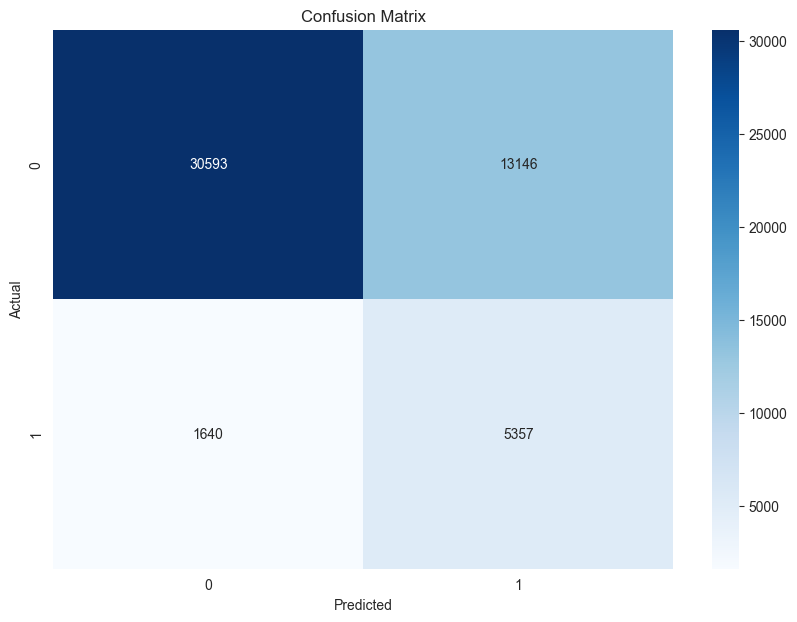

In [421]:
# Plotting the confusion matrix heatmap for random forest with subset of features
plot_confusion_matrix(rf_confusion_matrix_subset)

In [422]:
# Compute sensitivity and specificity for random forest with subset of features
compute_sensitivity_specificity(rf_confusion_matrix_subset)

Sensitivity: 0.77
Specificity: 0.7


### AdaBoost with subset of features

In [423]:
# Adaboost model with subset of features
adaboost_model_subset = AdaBoostClassifier(random_state=42)

adaboost_model_subset.fit(X_train_subset, Y_train_subset)

y_pred_ab_subset = adaboost_model_subset.predict(X_test_subset)

ab_report_subset = classification_report(Y_test_subset, y_pred_ab_subset)
ab_confusion_matrix_subset = confusion_matrix(Y_test_subset, y_pred_ab_subset)

print(ab_report_subset)
print(ab_confusion_matrix_subset)

C:\5. Semester\Maskinlæring\Assignment 1\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.55      0.15      0.23      6997

    accuracy                           0.87     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.83      0.87      0.83     50736

[[42908   831]
 [ 5962  1035]]


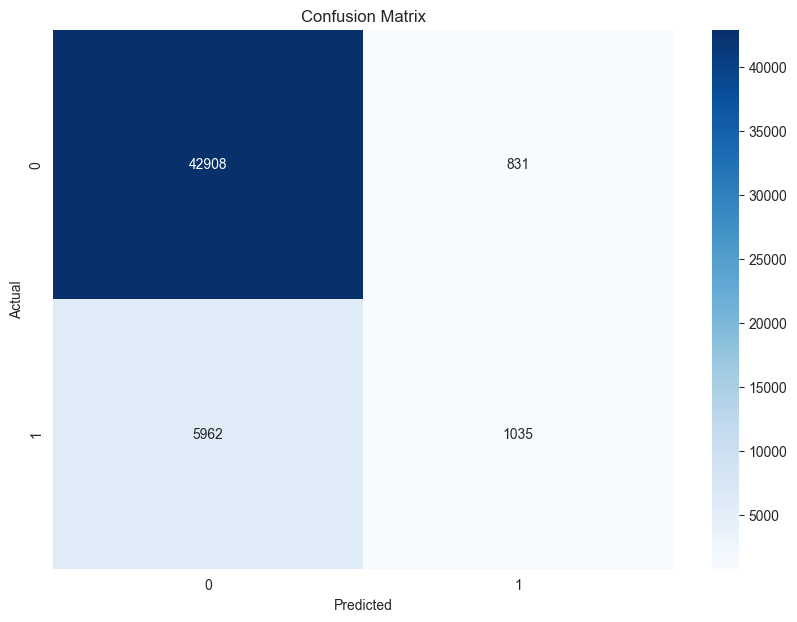

In [424]:
# Plotting the confusion matrix heatmap for adaboost with subset of features
plot_confusion_matrix(ab_confusion_matrix_subset)

In [425]:
# Compute sensitivity and specificity for adaboost with subset of features
compute_sensitivity_specificity(ab_confusion_matrix_subset)

Sensitivity: 0.15
Specificity: 0.98


In [426]:
# Plot ROC curve for all models with subset of features

plot_roc_curves([logistic_model_subsets, random_forest_model_subset, adaboost_model_subset], ['Logistic Regression', 'Random Forest', 'AdaBoost'] , X_test_subset, Y_test_subset)